# Model Traning on MNIST

In [1]:
# Import modules
from model import NeuralNet, relu, drelu, tanh, dtanh
from utils import db, show_model_metrics
import h5py
import numpy as np

### Import MNIST Data

In [2]:
TRAINDATA_FNAME = 'mnist_traindata.hdf5'  # Training data file
TESTDATA_FNAME = 'mnist_testdata.hdf5'  # Testing data file

# Read training data from file
with h5py.File(TRAINDATA_FNAME, 'r') as data:
    x_data = data['xdata'][:]
    y_data = data['ydata'][:]

# Read test data from file
with h5py.File(TESTDATA_FNAME, 'r') as data:
    x_test = data['xdata'][:]
    y_test = data['ydata'][:]

In [3]:
# Split data into training and validation set
x_train, x_valid = x_data[:50000,:], x_data[50000:,:]
y_train, y_valid = y_data[:50000,:], y_data[50000:,:]

### Models

The common parameters used across all models are as follows:

- **Structure :** 784 input neurons, 200 hidden layer 1 neurons, 100 hidden layer 2 neurons and 10 output neurons
- **Minibatch Size :** 100
- **Regularization :** None
- **Cost Function :** Multiclass cross entropy
- **Training Epochs :** 50

The parameters changed are indicated under the section for each model.

In [4]:
# Shared model parameters
structure = (784, 200, 100, 10)  # Neural network neuron structure
batchsize = 100  # Minibatch size
epochs = 50  # Number of training epochs

Model #1 Metrics:
Train Loss: 0.00018
Valid Loss: 0.09636
Train Accuracy: 100.00 %
Valid Accuracy: 98.31 %


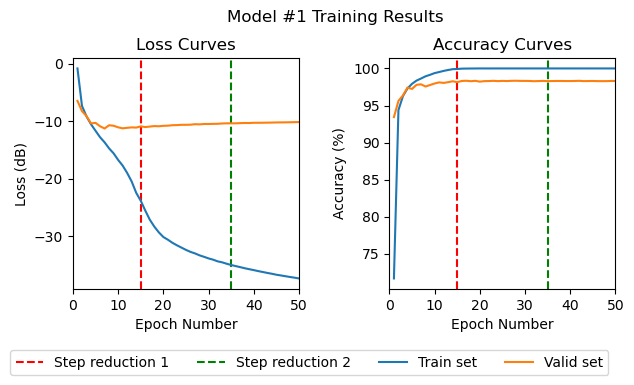

In [5]:
model1 = NeuralNet(structure, batchsize, 0.3, relu, drelu, 'he')
model1.train(x_train, y_train, x_valid, y_valid, epochs)
model1.save_model('models/model1.hdf5')
show_model_metrics(model1, 'Model')

#### Model #2
- **Activation Function :** ReLU
- **Learning Rate :** 0.1
- **Initialization :** Kaiming He

Model #2 Metrics:
Train Loss: 0.00133
Valid Loss: 0.09880
Train Accuracy: 100.00 %
Valid Accuracy: 97.92 %


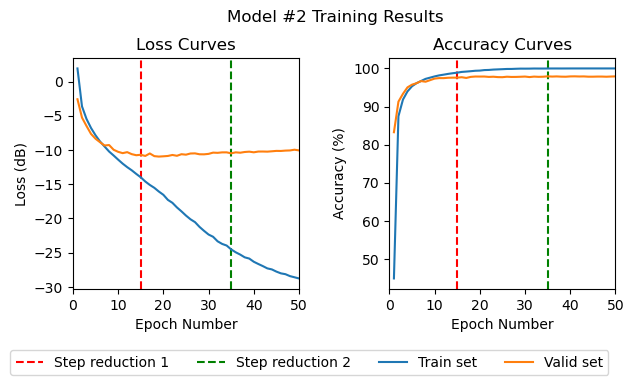

In [6]:
model2 = NeuralNet(structure, batchsize, 0.1, relu, drelu, 'he')
model2.train(x_train, y_train, x_valid, y_valid, epochs)
model2.save_model('models/model2.hdf5')
show_model_metrics(model2, 'Model #2')

#### Model #3
- **Activation Function :** ReLU
- **Learning Rate :** 0.01
- **Initialization :** Kaiming He

Model #3 Metrics:
Train Loss: 0.13775
Valid Loss: 0.14437
Train Accuracy: 96.10 %
Valid Accuracy: 95.98 %


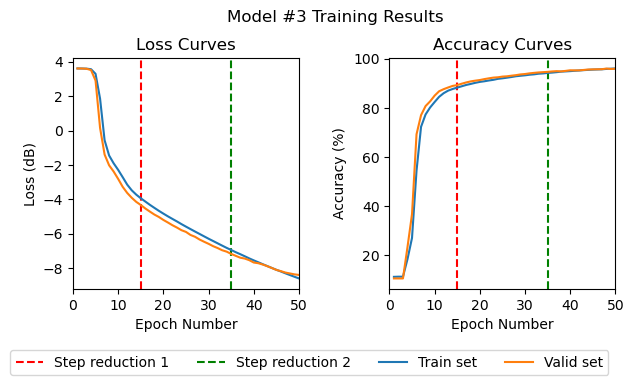

In [7]:
model3 = NeuralNet(structure, batchsize, 0.01, relu, drelu, 'he')
model3.train(x_train, y_train, x_valid, y_valid, epochs)
model3.save_model('models/model3.hdf5')
show_model_metrics(model3, 'Model #3')

#### Model #4
- **Activation Function :** tanh
- **Learning Rate :** 0.3
- **Initialization :** Xavier

Model #4 Metrics:
Train Loss: 0.00069
Valid Loss: 0.08366
Train Accuracy: 100.00 %
Valid Accuracy: 98.02 %


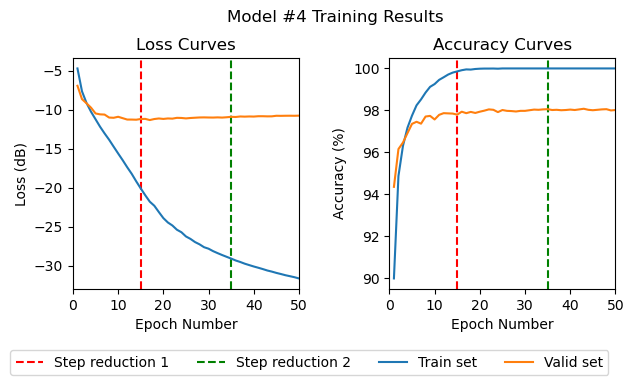

In [8]:
model4 = NeuralNet(structure, batchsize, 0.3, tanh, dtanh, 'xavier')
model4.train(x_train, y_train, x_valid, y_valid, epochs)
model4.save_model('models/model4.hdf5')
show_model_metrics(model4, 'Model #4')

#### Model #5
- **Activation Function :** tanh
- **Learning Rate :** 0.1
- **Initialization :** Xavier

Model #5 Metrics:
Train Loss: 0.00365
Valid Loss: 0.07308
Train Accuracy: 99.99 %
Valid Accuracy: 98.04 %


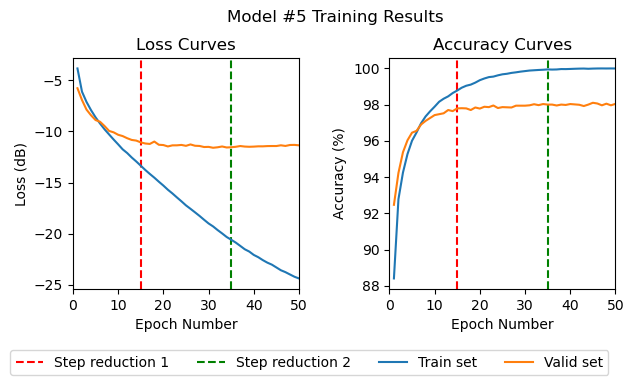

In [9]:
model5 = NeuralNet(structure, batchsize, 0.1, tanh, dtanh, 'xavier')
model5.train(x_train, y_train, x_valid, y_valid, epochs)
model5.save_model('models/model5.hdf5')
show_model_metrics(model5, 'Model #5')

#### Model #6
- **Activation Function :** tanh
- **Learning Rate :** 0.05
- **Initialization :** Xavier

Model #6 Metrics:
Train Loss: 0.01457
Valid Loss: 0.07401
Train Accuracy: 99.79 %
Valid Accuracy: 97.81 %


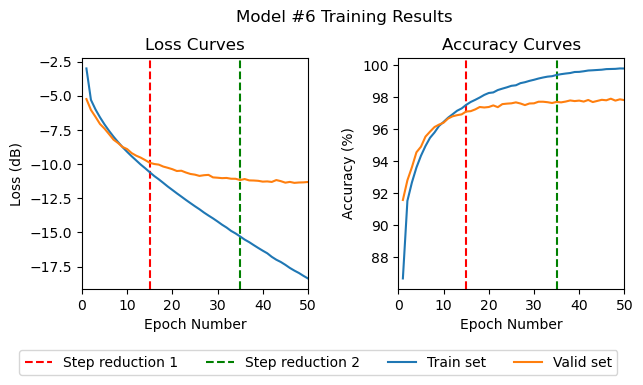

In [10]:
model6 = NeuralNet(structure, batchsize, 0.05, tanh, dtanh, 'xavier')
model6.train(x_train, y_train, x_valid, y_valid, epochs)
model6.save_model('models/model6.hdf5')
show_model_metrics(model6, 'Model #6')

#### Final Model

Model #1 was selected as the final model as it had the highest validation set accuracy of 98.31% out of all the 6 models tested. The model was trained using all 60 000 training set samples with no validation set as opposed to the 50 000 training samples and 10 000 validation samples used in testing the models. Finally the model was tested on the MNIST testing set of 10 000 samples with the final test set loss and accuracy shown below. The non-shared parameters used for this model are those of model #1. These parameters are:

- **Activation Function :** ReLU
- **Learning Rate :** 0.3
- **Initialization :** Kaiming He

In [11]:
modelfinal = NeuralNet(structure, batchsize, 0.3, relu, drelu, 'he')
modelfinal.train(x_data, y_data, epochs=epochs)
modelfinal.save_model('models/modelfinal.hdf5')
loss, accuracy = modelfinal.compute_metrics(x_test, y_test)
print('Final Model Performance:')
print('Final Test Loss: {0:.5f}'.format(modelfinal.loss_valid[-1]))
print('Final Test Accuracy: {0:.2f} %'.format(modelfinal.accuracy_valid[-1]))

Final Model Performance:
Final Test Loss: 0.08559
Final Test Accuracy: 98.29 %
